In [1]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

import scipy
import numpy as np
from scipy import interpolate
from io import StringIO


from scipy.interpolate import UnivariateSpline

# Reading data

CSV format

In [2]:
#from bigfloat import *

def isNaN(string):
    return string != string
print(isNaN("hello"))
print(isNaN(np.nan))

False
True


Muninn format

In [3]:
res=1
vars=["m", "beta", "psi", "derpsi"]
time=[]
grid=[]
m=[]
beta=[]
psi=[]
derpsi=[]
k=1
m_ori=[]
m_scri=[]
beta_ori=[]
beta_scri=[]
psi_ori=[]
psi_scri=[]
derpsi_ori=[]
derpsi_scri=[]

for var in vars:
   
    #nearcriticalone TRASH
    #dir="/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/StoredDATA/bondimassdecay/nearcritical/{}.txt".format(var)
    
    #nearcriticaltwo (more tuned) TRASH
    #dir="/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/StoredDATA/bondimassdecay/nearcritical0.1256/{}.txt".format(var)
    
    #subcriticalone A=0.01 TRASH
    #dir="/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/StoredDATA/bondimassdecay/subcritical0.01/{}.txt".format(var)
    
    #subcriticaltwo A=0.001
    #dir="/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/StoredDATA/bondimassdecay/subcritical0.001/{}.txt".format(var)
    
    #supercritical A=0.17 N=400
    dir="/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/StoredDATA/bondimassdecay/supercritical0.17/{}.txt".format(var)
    
    ##new##
    
    #A0.1256 called it nearcritical but its actually subcritical 
    #dir="/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/StoredDATA/bondimassdecay/0.1256/muninnDATA/res1/{}.txt".format(var)

    
    print(dir)
    t=0
    with open(dir) as f:
        for line in f:

            index = line.find("Time")
            
            if index==1:
                t=t+1
                if k==1:
                    time.append(float(line[index+7:len(line)-1]))
                auxgrid=[]
                auxdata=[]
                

            else:
                
                a=line.split()
                if a!=[]:
                    if k==1:
                        auxgrid.append(float(a[0]))
                    auxdata.append(float(a[1]))
                    
                elif a==[]:
                    
                    
                    if k==1:
                        if t==1:
                            grid.append(auxgrid)
                        L=len(auxgrid)
                        m_ori.append(auxdata[3])
                        m_scri.append(auxdata[L-4])
                    elif k==2:
                        beta_ori.append(auxdata[3])
                        beta_scri.append(auxdata[L-4])
                    elif k==3:
                        psi_ori.append(auxdata[3])
                        psi_scri.append(auxdata[L-4])
                    elif k==4:
                        derpsi_ori.append(auxdata[3])
                        derpsi_scri.append(auxdata[L-4])
                    
    k=k+1

#count=len(datatime[2])+1
#count

/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/StoredDATA/bondimassdecay/supercritical0.17/m.txt
/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/StoredDATA/bondimassdecay/supercritical0.17/beta.txt
/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/StoredDATA/bondimassdecay/supercritical0.17/psi.txt
/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/StoredDATA/bondimassdecay/supercritical0.17/derpsi.txt


In [14]:
#m_nearcriticalone=m_scri
#x_nearcriticalone=converttobondi(time,beta_scri)

#m_nearcriticaltwo=m_scri
#x_nearcriticaltwo=converttobondi(time,beta_scri)

#m_subcriticalone=m_scri
#x_subcriticalone=converttobondi(time,beta_scri)


## data used for plots:

#m_subcriticaltwo=m_scri
#x_subcriticaltwo=converttobondi(time,beta_scri)

m_supercritical=m_scri
x_supercritical=converttobondi(time,beta_scri)

#m_new=m_scri
#x_new=converttobondi(time,beta_scri)


# Convert to Bondi

In [52]:
#trapezoidal rule
def trap_integrator(func,f0,x):
    integration=[f0]
    for i in range(0,len(x)-1):
        dx=x[i+1]-x[i]
    
        integral=dx/2*(func(x[i+1])+func(x[i]))
        
        integration.append(integration[i]+integral)
    return integration

"""def funcc(x):
    return x

def trap_integrator(func,f0,x0,x1):
    dx=(x1-x0)
    integral=dx/2*(func(x0)+func(x1))
    
    return f0+integral

trap_integrator(funcc,0,0,1)"""

#convert central time to bondi time
def converttobondi(time, betascri):

    spl = UnivariateSpline(time, np.multiply(np.exp(np.multiply(betascri,-2)),time), s=0)

    return trap_integrator(spl,0,time)

####

# Styling plots

In [74]:
plt.rcParams.update({
    'font.size': 12,
    'legend.fontsize':12,
    'xtick.labelsize': 'large',
    'xtick.color': 'black',
    'ytick.labelsize': 'large',
    'ytick.color': 'black'})

4.396691147910631e-14

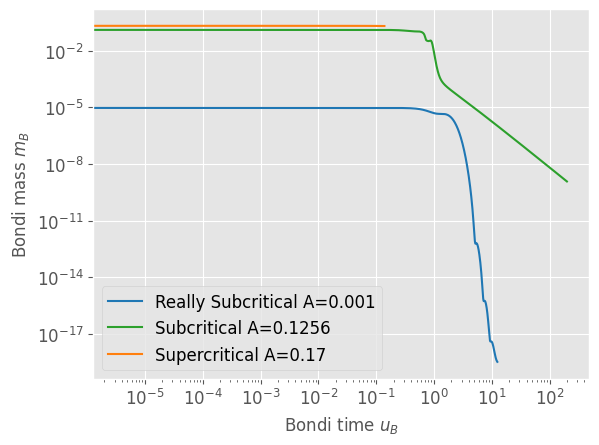

In [153]:

with plt.style.context('ggplot'):  
    
    plt.plot(x_subcriticaltwo, m_subcriticaltwo,label="Really Subcritical A=0.001",color='#1f77b4')
    
    plt.plot(x_new, m_new,label="Subcritical A=0.1256",color='#2ca02c')
    
    plt.plot(x_supercritical, m_supercritical,label="Supercritical A=0.17",color='#ff7f0e')

    
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Bondi time $u_B$")#$\u03C4$")
    plt.ylabel("Bondi mass $m_B$")#$\u03C4$")
    #plt.title('Bondi mass decay')
    plt.legend();

    #plt.xlim([2,200])
    #plt.ylim([1e-9,8e-5])
    plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
    plt.show()

/tmp/ipykernel_43509/731289259.py:4: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale("log")


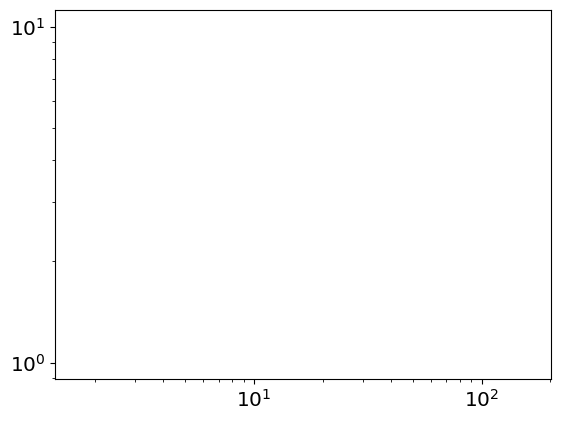

In [152]:

plt.plot(x_new[800:6000], func(x_new[800:6000], *popt), label='fit: a=%5.3f, b=%5.3f' % tuple(popt),linestyle='dashed')

plt.xscale("log")
plt.yscale("log")

In [23]:
len(x_new)

6667

In [54]:
import numpy as np

import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

def func(x, a, b):
    if type(x)==float:
        return a * x + b
    else:
        z=np.zeros(len(x))
        for i in range(0,len(x)):
            z[i] = a * x[i] + b
        return z

In [74]:
"""popt, pcov = curve_fit(func, x_new[1100:6667], m_new[1100:6667])

plt.plot(x_new[1100:6667], func(x_new[1100:6667], *popt), 'r-', label='fit: a=%5.3f, b=%5.3f' % tuple(popt))""";

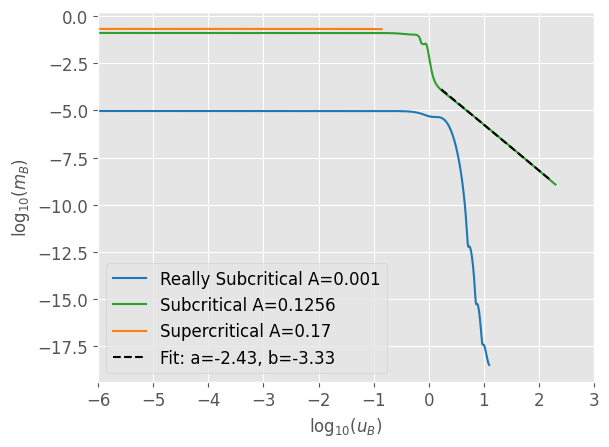

In [185]:
x_newlog = [math.log10(float(x)) for x in x_new[1:len(x_new)]]
y_newlog = [math.log10(float(x)) for x in m_new[1:len(x_new)]]

x_subcriticaltwolog = [math.log10(float(x)) for x in x_subcriticaltwo[1:len(x_subcriticaltwo)]]
m_subcriticaltwolog = [math.log10(float(x)) for x in m_subcriticaltwo[1:len(x_subcriticaltwo)]]
x_supercriticallog = [math.log10(float(x)) for x in x_supercritical[1:len(x_supercritical)]]
m_supercriticallog = [math.log10(float(x)) for x in m_supercritical[1:len(x_supercritical)]]

xx = [math.log10(float(x)) for x in x_new[800:6000]]
yy = [math.log10(float(x)) for x in m_new[800:6000]]

popt, pcov = curve_fit(func, xx, yy)

with plt.style.context('ggplot'):  
    
    #data
    plt.plot([-6]+x_subcriticaltwolog, [m_subcriticaltwolog[0]]+m_subcriticaltwolog,label="Really Subcritical A=0.001",color='#1f77b4')
    
    plt.plot([-6]+x_newlog,[y_newlog[0]]+y_newlog,label="Subcritical A=0.1256",color='#2ca02c')
    
    plt.plot([-6]+x_supercriticallog, [m_supercriticallog[0]]+m_supercriticallog,label="Supercritical A=0.17",color='#ff7f0e')
    
    #fit
    plt.plot(xx, func(xx, *popt), label='Fit: a=%5.2f, b=%5.2f' % tuple(popt),color='#000000',linestyle='dashed',)
   

    plt.xlim([-6,3])
    plt.xlabel("log$_{10}$($u_B$)")#$\u03C4$")
    plt.ylabel("log$_{10}$($m_B$)")#$\u03C4$")
    plt.legend();

    plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
    plt.show()

In [91]:
x_new

[0,
 3.1708949349049476e-06,
 1.2679256390146471e-05,
 2.851641912926009e-05,
 5.067368078032013e-05,
 7.914230171725346e-05,
 0.00011391350494206615,
 0.00015497847596779725,
 0.00020232836270416465,
 0.00025595427534369464,
 0.00031584728624915986,
 0.00038199842984277393,
 0.0004543987024969538,
 0.0005330390624265303,
 0.0006179104295825324,
 0.0007090036855483689,
 0.0008063096734378413,
 0.0009098191977928544,
 0.001019523024484727,
 0.0011354118806182775,
 0.0012574764544369976,
 0.0013857073952286295,
 0.0015200953132352116,
 0.0016606307795635365,
 0.0018073043260978224,
 0.001960106445418546,
 0.0021190275907193596,
 0.002284058175725869,
 0.002455188574619737,
 0.002632409121963329,
 0.0028157101126285618,
 0.0030050818017260403,
 0.0032005144045406278,
 0.00340199809646935,
 0.0036095230129561647,
 0.0038230792494326716,
 0.00404265686126807,
 0.004268245863715315,
 0.004499836231860197,
 0.004737417900579606,
 0.004980980764496037,
 0.005230514677936938,
 0.005486009454899

array([-2.4436141 , -3.30513218])

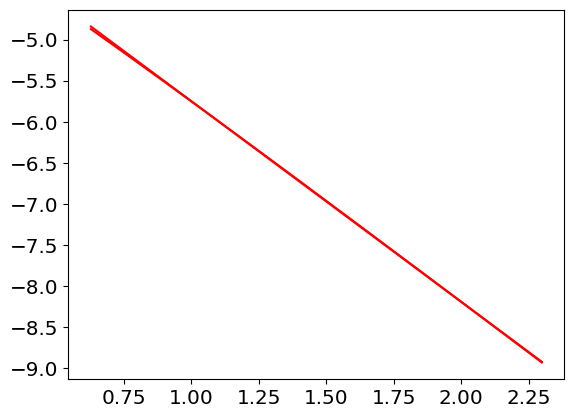

In [105]:
xx = [math.log10(float(x)) for x in x_new[1100:6667]]
yy = [math.log10(float(x)) for x in m_new[1100:6667]]


plt.plot(xx,yy, 'r-', label='fit: a=%5.3f, b=%5.3f' % tuple(popt))

popt, pcov = curve_fit(func, xx, yy)

plt.plot(xx, func(xx, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f' % tuple(popt))
plt.plot
popt

In [69]:
ln10(m)=-2.4ln(ub)-3.3

1.0

In [ ]:
mb=const*ub^-2.4

Figure 7 attempt

In [187]:
adapt_time=[]
tau_star=0.15
for x in x_supercritical:
    if x<=tau_star:
        adapt_time.append(-math.log(abs((tau_star-x))))
        
adapt_time;

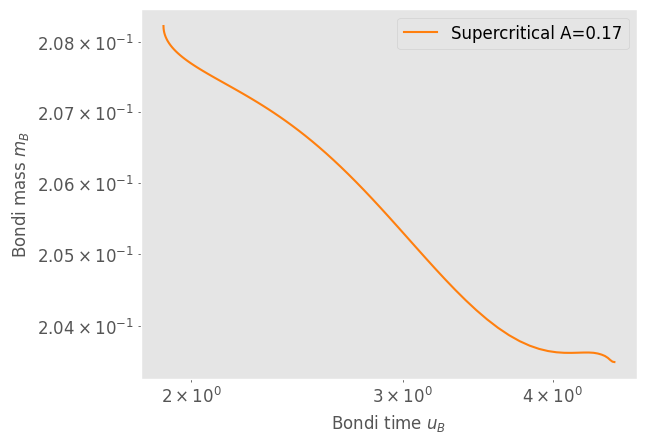

In [189]:

with plt.style.context('ggplot'):
    
    #plt.plot(x_supercritical, m_supercritical,label="Supercritical A=0.17",color='#ff7f0e')
    plt.plot(adapt_time[0:len(m_supercritical)], m_supercritical,label="Supercritical A=0.17",color='#ff7f0e')

    plt.xscale("log")
    plt.yscale("log")
    
    plt.xlabel("Bondi time $u_B$")#$\u03C4$")
    plt.ylabel("Bondi mass $m_B$")#$\u03C4$")
    #plt.title('Bondi mass decay')
    plt.legend();
    #plt.ylim([1e-6,1])
    #plt.xlim([0,5])
    #plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
    plt.show()

Value of Bondi mass at scri+ over time

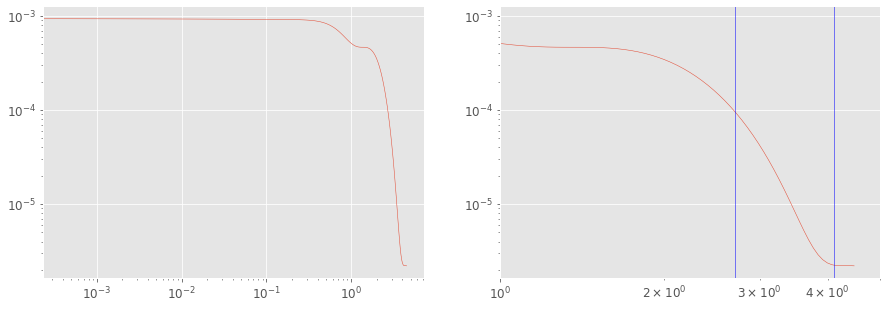

In [292]:
with plt.style.context('ggplot'):
    #plt.rcParams.update({'font.size': 12})    
    #plt.rcParams["figure.figsize"] = (7,5)
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15, 5))

    ax1.plot(x_subcriticalone,m_subcriticalone,linewidth=0.5)
    ax1.set_xscale("log")
    ax1.set_yscale("log")
    
    ax2.plot(aa,m_subcriticalone,linewidth=0.5)
    ax2.set_xscale("log")
    ax2.set_yscale("log")
    
    ax2.set_xlim([1,5])
    ax2.axvline(x = 2.7, color = 'b', linewidth=0.5)
    ax2.axvline(x = 4.1, color = 'b', linewidth=0.5)
 
    
    
    plt.show()

In [29]:
(10^(-16)-10^(-8))/(4.1-2.7)

14.285714285714292

# Mass scaling

In [2]:
m=[]


dir = "/home/rita13santos/Desktop/massscalingdata"

print(dir)
    
count=0
for path in os.listdir(dir):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir, path)):
        count += 1
print('File count in dir', dir, 'is: ', count)


with pd.option_context('display.precision', 20):
    df = pd.read_csv(dir + "/parameters.csv", header=None, dtype = str)
    """df = df.to_numpy()
    df = np.transpose(df)"""

/home/rita13santos/Desktop/massscalingdata
File count in dir /home/rita13santos/Desktop/massscalingdata is:  1


In [3]:
len(df[1])
#df[1:len(df[1]),7]

49

In [4]:
df

,0,1,2,3,4,5,6,7
0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
1,0.0,0.12465049029180245,0.3,0.7,0.0,0.0,1.0,0.0
2,1.0,0.12465049029180245,0.3,0.7,2.042834536011173,0.0,1.0,0.00017657892150102063
3,1.0,0.12465049029186315,0.3,0.7,2.042834525195573,0.0,2.0,0.00017658796559531364
4,1.0,0.12465049029196323,0.3,0.7,2.042834507368312,0.0,3.0,0.0001766028754919357
5,1.0,0.12465049029212824,0.3,0.7,2.0428344779760548,0.0,4.0,0.00017662746486786195
6,1.0,0.12465049029240031,0.3,0.7,2.0428344295107,0.0,5.0,0.0001766680298804966
7,1.0,0.12465049029284886,0.3,0.7,2.0428343496242243,0.0,6.0,0.00017673494628018405
8,1.0,0.12465049029358839,0.3,0.7,2.0428342179139447,0.0,7.0,0.00017684541485226676
9,1.0,0.12465049029480768,0.3,0.7,2.0428340007752075,0.0,8.0,0.00017702792246789752


In [5]:
auxm=list(df.get(7))
mdata=auxm[2:len(auxm)]
mdata

['0.00017657892150102063',
 '0.00017658796559531364',
 '0.0001766028754919357',
 '0.00017662746486786195',
 '0.0001766680298804966',
 '0.00017673494628018405',
 '0.00017684541485226676',
 '0.00017702792246789752',
 '0.00017732981344000518',
 '0.00017783029632858707',
 '0.00017866301850908814',
 '0.0001800571067192635',
 '0.00018241566486747125',
 '0.00018648048425777496',
 '0.00019372783795983535',
 '0.00020754615979766536',
 '0.00023817800190904155',
 '0.0003417128055375159',
 '0.07013000064127345',
 '0.00017942738652879792',
 '0.00019095760182924655',
 '0.00017683209025161575',
 '0.0003706697430701009',
 '0.00020777622569381779',
 '0.00022943129135517799',
 '0.0002619016190727547',
 '0.00019544841435576517',
 '0.0008785826840710514',
 '0.0012310978985968933',
 '0.0015873899077474389',
 '0.0019422799409460055',
 '0.002299565026024969',
 '0.0024694459095327328',
 '0.0030031453418483244',
 '0.003362320418886938',
 '0.0040869329875708816',
 '0.005877553652280474',
 '0.007523949859834432'

In [6]:
auxp=list(df.get(1))
pdata=auxp[2:len(auxp)]
pdata

['0.12465049029180245',
 '0.12465049029186315',
 '0.12465049029196323',
 '0.12465049029212824',
 '0.12465049029240031',
 '0.12465049029284886',
 '0.12465049029358839',
 '0.12465049029480768',
 '0.12465049029681796',
 '0.12465049030013234',
 '0.12465049030559681',
 '0.12465049031460622',
 '0.12465049032946021',
 '0.12465049035395032',
 '0.12465049039432767',
 '0.12465049046089866',
 '0.12465049057065568',
 '0.12465049075161441',
 '0.12465049104996491',
 '0.12465049154186174',
 '0.12465049235286249',
 '0.12465049368997669',
 '0.1246504958945053',
 '0.12465049952915853',
 '0.12465050552168862',
 '0.12465051540170043',
 '0.12465053169108606',
 '0.12465055854774264',
 '0.12465060282688359',
 '0.12465067583084513',
 '0.12465079619402937',
 '0.12465099463937143',
 '0.12465132182042797',
 '0.12465186125079525',
 '0.12465275062111585',
 '0.12465421694488095',
 '0.1246566345040622',
 '0.1246606203853075',
 '0.12466719199249911',
 '0.12467802674105861',
 '0.12469589022147136',
 '0.124725342121596

In [7]:
pstar=0.12465049029170887
xgraph = [np.log(float(x) - pstar) for x in pdata]
ygraph = [np.log(float(x)) for x in mdata]

(-16.0, -6.0)

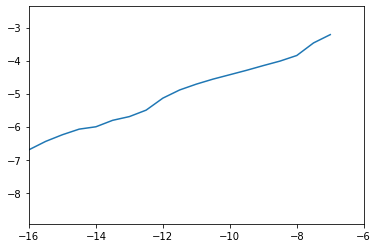

In [8]:
plt.plot(xgraph,ygraph)
"""plt.xscale("log")
plt.yscale("log")"""
plt.xlim([-16,-6])

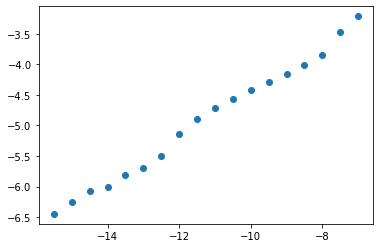

In [12]:
plt.scatter(xgraph[29:len(xgraph)],ygraph[29:len(ygraph)])



In [24]:
import numpy as np

import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

def func(x, a, b):
    
    if type(x)==float:
        return a * x + b
    else:
        z=np.zeros(len(x))
        for i in range(0,len(x)):
            z[i] = a * x[i] + b
        return z
    end


In [29]:


popt, pcov = curve_fit(func, xgraph[29:len(xgraph)],ygraph[29:len(ygraph)])

popt

#plt.plot(xgraph[28:len(xgraph)], func(xgraph[28:len(xgraph)], *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

array([ 0.37041644, -0.74853009])

In [18]:
0.74853009/2

0.36481431

In [33]:
0.7485/2

0.37425

In [ ]:
0.37041644*ln(p-p*)-0.74853009=ln(m)

In [ ]:
e^0.37041644*ln(p-p*)-0.74853009=ln(m)

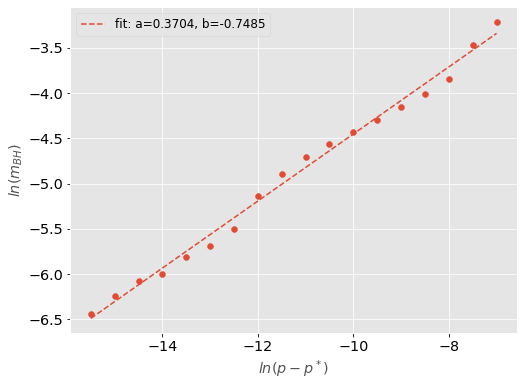

In [34]:

with plt.style.context('ggplot'):
    
    plt.rcParams["figure.figsize"] = (8,6)
    plt.rcParams["font.size"]= 12
    plt.rcParams["legend.fontsize"]= 12
    plt.rcParams["xtick.labelsize"]= "large"
    plt.rcParams["xtick.color"]= "black"
    plt.rcParams["ytick.labelsize"]= "large"
    plt.rcParams["ytick.color"]= "black"


    plt.scatter(xgraph[29:len(xgraph)],ygraph[29:len(ygraph)],s=35)
    #plt.scatter(converttobondi(time,beta_scri)[0:len(time)-1],massloss, alpha=0.5,s=20)
    #plt.plot(converttobondi(time,beta_scri)[0:len(time)-1],masslossexp,label='Numerical',linewidth=1)
    #plt.plot(converttobondi(time,beta_scri)[0:len(time)-1],massloss,label='Analytical',linewidth=1,alpha=0.5)
    
    
    plt.plot(xgraph[29:len(xgraph)], func(xgraph[29:len(xgraph)], *popt), label='fit: a=%5.4f, b=%5.4f' % tuple(popt),linestyle='dashed')

    plt.xlabel("$ln(p-p^*)$")#$\u03C4$")
    plt.ylabel("$ln(m_{BH}$)")#$\u03C4$")
    
    plt.legend();
#olor='#1f77b4'
#color='#ff7f0e'
    plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")

    plt.show()
#plt.xlim([0,3])

# Mass decay

A=0.1256

m,u = 4 pi r phi,u ((r-2m)phi,r- exp(-2beta)r phi,u)

In [39]:
res=1
vars=["m", "beta", "psi", "derpsi"]
time=[]
grid=[]
m=[]
beta=[]
psi=[]
derpsi=[]
k=1
m_ori=[]
m_scri=[]
beta_ori=[]
beta_scri=[]
psi_ori=[]
psi_scri=[]
derpsi_ori=[]
derpsi_scri=[]

for var in vars:
   
    #A0.1256 called it nearcritical but its actually subcritical 
    #dir="/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/StoredDATA/bondimassdecay/0.1256/muninnDATA/res1/{}.txt".format(var)
    
    #subcriticaltwo A=0.001
    dir="/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/StoredDATA/bondimassdecay/subcritical0.001/{}.txt".format(var)
    
    
    print(dir)
    t=0
    with open(dir) as f:
        for line in f:

            index = line.find("Time")
            
            if index==1:
                t=t+1
                if k==1:
                    time.append(float(line[index+7:len(line)-1]))
                auxgrid=[]
                auxdata=[]
                

            else:
                
                a=line.split()
                if a!=[]:
                    if k==1:
                        auxgrid.append(float(a[0]))
                    auxdata.append(float(a[1]))
                    
                elif a==[]:
                    
                    
                    if k==1:
                        if t==1:
                            grid.append(auxgrid)
                        L=len(auxgrid)
                        m_ori.append(auxdata[3])
                        m_scri.append(auxdata[L-4])
                    elif k==2:
                        beta_ori.append(auxdata[3])
                        beta_scri.append(auxdata[L-4])
                    elif k==3:
                        psi_ori.append(auxdata[3])
                        psi_scri.append(auxdata[L-4])
                    elif k==4:
                        derpsi_ori.append(auxdata[3])
                        derpsi_scri.append(auxdata[L-4])
                    
    k=k+1

#count=len(datatime[2])+1
#count

/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/StoredDATA/bondimassdecay/subcritical0.001/m.txt
/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/StoredDATA/bondimassdecay/subcritical0.001/beta.txt
/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/StoredDATA/bondimassdecay/subcritical0.001/psi.txt
/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/StoredDATA/bondimassdecay/subcritical0.001/derpsi.txt


In [40]:
(m^(1,0))[ut,x]->4 \[Pi]*x* (\[CapitalPhi]^(1,0))[ut,x]( 1-E^(-2 \[Beta][ut,x/(1-x)]) r^2(\[CapitalPhi]^(1,0))[ut,x])

SyntaxError: invalid syntax (3935730999.py, line 1)

In [41]:
#phi,u
deruphi = []

for i in range(0, len(psi_scri)-1):
    aux=(psi_scri[i+1]-psi_scri[i])/(time[i+1]-time[i])##eq.59 from my report ref eq:news
    deruphi.append(aux)

#theoretical mass loss

massloss=[]

for i in range(0, len(psi_scri)-1):
    
    aux=-4*math.pi*deruphi[i]**2*math.exp(-2*beta_scri[i])
    massloss.append(aux)


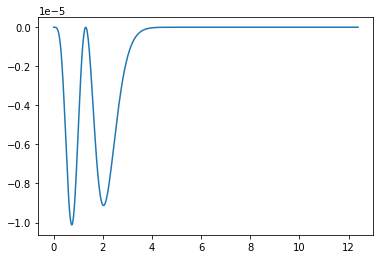

In [53]:
plt.plot(converttobondi(time,beta_scri)[0:len(time)-1],massloss)

In [43]:
#experimental mass loss
masslossexp=[]
for i in range(0, len(m_scri)-1):
    aux=(m_scri[i+1]-m_scri[i])/(time[i+1]-time[i])##eq.59 from my report ref eq:news
    masslossexp.append(aux)

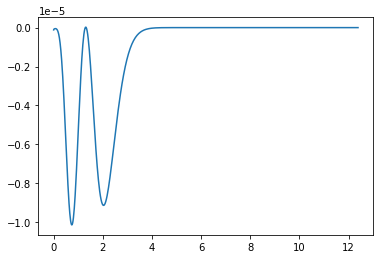

In [57]:
plt.plot(converttobondi(time,beta_scri)[0:len(time)-1],masslossexp,label='fefw')


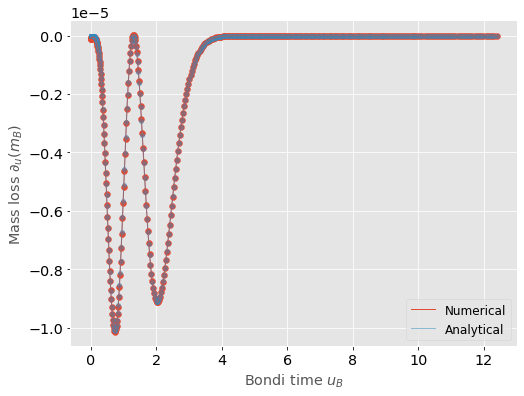

In [123]:

with plt.style.context('ggplot'):
    
    plt.rcParams["figure.figsize"] = (8,6)
    plt.rcParams["font.size"]= 12
    plt.rcParams["legend.fontsize"]= 12
    plt.rcParams["xtick.labelsize"]= "large"
    plt.rcParams["xtick.color"]= "black"
    plt.rcParams["ytick.labelsize"]= "large"
    plt.rcParams["ytick.color"]= "black"

    
    plt.scatter(converttobondi(time,beta_scri)[0:len(time)-1],masslossexp,s=35)
    plt.scatter(converttobondi(time,beta_scri)[0:len(time)-1],massloss, alpha=0.5,s=20)
    plt.plot(converttobondi(time,beta_scri)[0:len(time)-1],masslossexp,label='Numerical',linewidth=1)
    plt.plot(converttobondi(time,beta_scri)[0:len(time)-1],massloss,label='Analytical',linewidth=1,alpha=0.5)
    
    plt.xlabel("Bondi time $u_B$")#$\u03C4$")
    plt.ylabel("Mass loss $\partial_u(m_B)$")#$\u03C4$")
    
    plt.legend();
#olor='#1f77b4'
#color='#ff7f0e'
    plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")

    plt.show()
#plt.xlim([0,3])

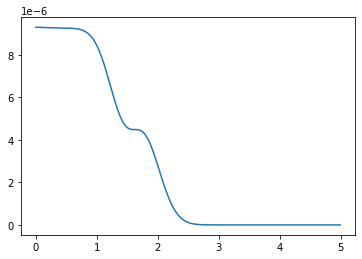

In [45]:
plt.plot(time,m_scri)